In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import lightgbm as lgb # Importando o LightGBM

# Carregando o dataset
df = pd.read_csv('../data/raw/application_train.csv')

# Divisão dos Dados
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Recriando o Pré-processador

# Identificar colunas numéricas e categóricas
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('object').columns.tolist()

# Criar os pipelines de transformação
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Juntar tudo no ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Usamos distribuições para que o RandomizedSearch possa sortear valores
param_dist = {
    'classifier__n_estimators': [200, 300, 400, 500],
    'classifier__learning_rate': [0.01, 0.02, 0.05, 0.1],
    'classifier__num_leaves': [20, 31, 40, 50],
    'classifier__max_depth': [-1, 5, 10, 15],
    'classifier__reg_alpha': [0.1, 0.5, 1],
    'classifier__reg_lambda': [0.1, 0.5, 1]
}

In [13]:
from sklearn.model_selection import GridSearchCV

# 
# Se cada parâmetro tiver 2 opções, teremos 2*2*2 = 8 combinações.
# Com cv=3, isso significa 8 * 3 = 24 treinamentos.
param_grid = {
    'classifier__n_estimators': [300, 400],
    'classifier__learning_rate': [0.02, 0.05],
    'classifier__num_leaves': [31, 40]
}


# Note que não há 'n_iter', pois ele testará todas as 8 combinações.
grid_search = GridSearchCV(
    lgbm_pipeline,
    param_grid=param_grid,  # O nome do argumento muda para param_grid
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nBusca em grade concluída!")
print(f"Melhor pontuação AUC encontrada na validação: {grid_search.best_score_:.4f}")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/

[LightGBM] [Info] Number of positive: 13240, number of negative: 150766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.391105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11449
[LightGBM] [Info] Number of data points in the train set: 164006, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486
[CV] END classifier__learning_rate=0.02, classifier__n_estimators=300, classifier__num_leaves=40; total time=  39.3s
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11423
[LightGBM] [Info] Number of data points in the train

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13240, number of negative: 150766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.260694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11449
[LightGBM] [Info] Number of data points in the train set: 164006, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486
[CV] END classifier__learning_rate=0.02, classifier__n_estimators=300, classifier__num_leaves=31; total time=  37.1s
[LightGBM] [Info] Number of positive: 13240, number of negative: 150766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.199095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.239029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11423
[LightGBM] [Info] Number of data points in the train set: 164005, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432480
[LightGBM] [Info] Start training from score -2.432480
[CV] END classifier__learning_rate=0.02, classifier__n_estimators=300, classifier__num_leaves=40; total time=  46.9s
[LightGBM] [Info] Number of positive: 13240, number of negative: 150765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11441
[LightGBM] [Info] Number of data points in the train

In [2]:
# pipeline com o LightGBM
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42, is_unbalance=True))
])

In [3]:
lgbm_pipeline.fit(X_train, y_train)
print("Treinamento concluído com sucesso!")

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11507
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 234
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Treinamento concluído com sucesso!


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AUC: 0.7599


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


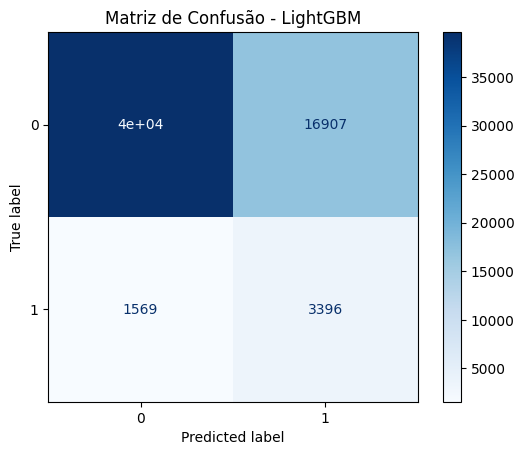

In [5]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Prever as probabilidades para a AUC
# Usamos .predict_proba() para obter a probabilidade de um cliente ser inadimplente (classe 1)
y_pred_proba_lgb = lgbm_pipeline.predict_proba(X_test)[:, 1]

# Calcular a pontuação AUC
# Comparamos as probabilidades previstas com os valores reais (y_test)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

# Fazer previsões definitivas para a Matriz de Confusão
# Usamos .predict() para obter a decisão final (0 ou 1) do modelo
y_pred_lgb = lgbm_pipeline.predict(X_test)

# Calcular e Plotar a Matriz de Confusão
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)

print(f"AUC: {auc_lgb:.4f}")

# Plotando a Matriz
disp_lgb.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - LightGBM')
plt.grid(False)
plt.show()

Avaliando o modelo otimizado (GridSearch) no conjunto de teste...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Resultados Finais do Modelo Otimizado (GridSearch):
AUC: 0.7606



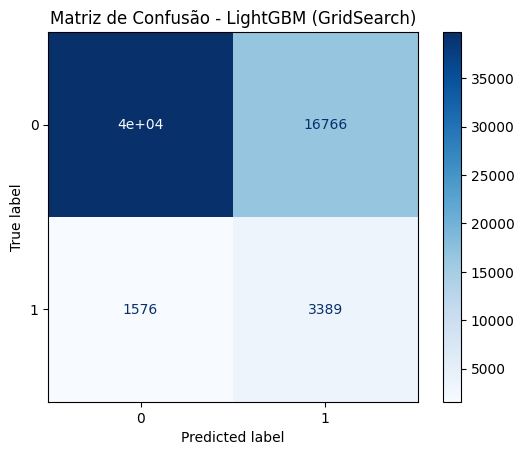

In [15]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Usar o melhor modelo encontrado pelo grid_search para prever
print("Avaliando o modelo otimizado (GridSearch) no conjunto de teste...")

# Prever as probabilidades para a AUC
y_pred_proba_gs = grid_search.predict_proba(X_test)[:, 1]

# Prever as decisões finais para a Matriz de Confusão
y_pred_gs = grid_search.predict(X_test)

# Calcular a nova AUC e a nova Matriz de Confusão
auc_gs = roc_auc_score(y_test, y_pred_proba_gs)
cm_gs = confusion_matrix(y_test, y_pred_gs)
disp_gs = ConfusionMatrixDisplay(confusion_matrix=cm_gs)

# --- Exibindo os Resultados Finais ---
print("\n" + "="*50)
print("Resultados Finais do Modelo Otimizado (GridSearch):")
print(f"AUC: {auc_gs:.4f}")
print("="*50 + "\n")

# Plotando a Matriz de Confusão do melhor modelo
disp_gs.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - LightGBM (GridSearch)')
plt.grid(False)
plt.show()